In [1]:
import pandas as pd

from significance_analysis import conduct_analysis

# Load example dataset
data = pd.read_csv("./example_dataset.csv")

P-value: 0.9875498913332933

As the p-value 0.9875498913332933 is not smaller than 0.05, we cannot reject the Null-Hypothesis that the model that does not consider the acquisition and the budget describes the data as well as the one that does. Therefore there is no significant difference within acquisition and budget
.
P-values adjusted by tukey method for family of 36 estimates
                  acquisition budget_bins  Estimate  2.5_ci  97.5_ci     SE     DF
1         ExpectedImprovement          11     8.249 -12.117   28.615  6.401  3.001
2    ProbabilityOfImprovement          11     8.351 -12.015   28.718  6.401  3.001
3        UpperConfidenceBound          11     8.231 -12.135   28.598  6.401  3.001
4        qExpectedImprovement          11     8.350 -12.017   28.716  6.401  3.001
5          qKnowledgeGradient          11     8.506 -11.860   28.872  6.401  3.001
6   qProbabilityOfImprovement          11     8.736 -11.630   29.102  6.401  3.001
7               qSimpleRegret        

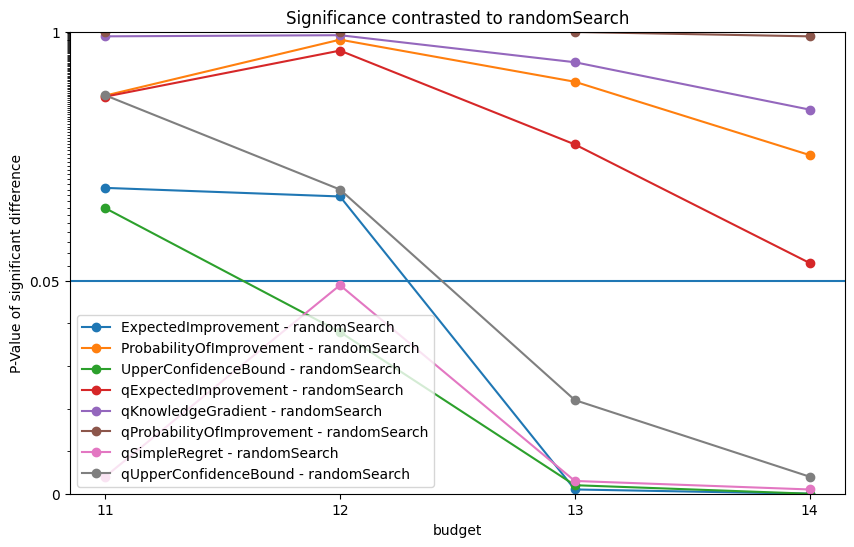

({'chi_square': 11.195269602161716, 'df': 24, 'p': 0.9875498913332933},
 (                  acquisition budget_bins  Estimate  2.5_ci  97.5_ci     SE     DF
  1         ExpectedImprovement          11     8.249 -12.117   28.615  6.401  3.001
  2    ProbabilityOfImprovement          11     8.351 -12.015   28.718  6.401  3.001
  3        UpperConfidenceBound          11     8.231 -12.135   28.598  6.401  3.001
  4        qExpectedImprovement          11     8.350 -12.017   28.716  6.401  3.001
  5          qKnowledgeGradient          11     8.506 -11.860   28.872  6.401  3.001
  6   qProbabilityOfImprovement          11     8.736 -11.630   29.102  6.401  3.001
  7               qSimpleRegret          11     8.044 -12.322   28.410  6.401  3.001
  8       qUpperConfidenceBound          11     8.352 -12.015   28.718  6.401  3.001
  9                randomSearch          11     8.729 -11.638   29.095  6.401  3.001
  10        ExpectedImprovement          12     7.706 -12.655   28.068  6.402 

In [2]:
# Second Analysis: Analyse performance of acquisition functions over all benchmarks binned by trainingrounds,
# i.e. performance in the first 8, the next 12, the next 15, the next 10 and the final 5 rounds.
# Does not print the results, only shows plots.
data2=data.loc[data["benchmark"]!="NN_HPO_Bench"]
data2=data2.loc[(data2["budget"]>10)&(data2["budget"]<16)]
conduct_analysis(
    data2,
    "mean",
    "acquisition",
    "benchmark",
    bin_id="budget",
    bins=[],
    summarize=True,
    show_plots=False,
    significance_plot="randomSearch"
)

In [3]:
import random
data3=data.loc[data["benchmark"]!="NN_HPO_Bench"]
runs=10

def proportion_data(data,runs,minimum=0,stepsize=1):
    data_by_algorithm=[]
    data4=pd.DataFrame(columns=data.columns)
    for algo in data["acquisition"].unique():
        data_by_algorithm.append(data.loc[data["acquisition"]==algo])
        seed_list=list(data_by_algorithm[-1]["seed"].unique())
        for seed in seed_list:
            if len(data.loc[data["seed"]==seed]["seed"])!=50:
                seed_list.remove(seed)
        if minimum==0:
            selected_seeds=random.sample(seed_list,runs)
            for seed in selected_seeds:
                data4=pd.concat([data4,data_by_algorithm[-1].loc[data_by_algorithm[-1]["seed"]==seed]])
            
        else:
            selected_seeds=random.sample(seed_list,minimum-1)
            
            for seed in selected_seeds:
                data4=pd.concat([data4,data_by_algorithm[-1].loc[data_by_algorithm[-1]["seed"]==seed]])
            list_of_datasets=[data4]
            for run in range(minimum,runs,stepsize):
                for step in range(stepsize):
                    selected_seeds.append(next((x for x in seed_list if x not in selected_seeds), None))
                    data4=pd.concat([data4,data_by_algorithm[-1].loc[data_by_algorithm[-1]["seed"].isin([selected_seeds[-1]])]])
                list_of_datasets.append(data4)
    if minimum==0:
        return data4    
    return list_of_datasets


   
print((proportion_data(data3,10,7,2)))

[         seed   benchmark                acquisition     surrogate                   surrogate_acquisition        mean  sem budget    acqu_class
10550   14697  Jahs_Bench        ExpectedImprovement  SingleTaskGP        SingleTaskGP_ExpectedImprovement   36.619976  0.0      0    Analytical
10551   14697  Jahs_Bench        ExpectedImprovement  SingleTaskGP        SingleTaskGP_ExpectedImprovement   36.619976  0.0      1    Analytical
10552   14697  Jahs_Bench        ExpectedImprovement  SingleTaskGP        SingleTaskGP_ExpectedImprovement   36.619976  0.0      2    Analytical
10553   14697  Jahs_Bench        ExpectedImprovement  SingleTaskGP        SingleTaskGP_ExpectedImprovement   36.619976  0.0      3    Analytical
10554   14697  Jahs_Bench        ExpectedImprovement  SingleTaskGP        SingleTaskGP_ExpectedImprovement   36.619976  0.0      4    Analytical
10555   14697  Jahs_Bench        ExpectedImprovement  SingleTaskGP        SingleTaskGP_ExpectedImprovement   36.619976  0.0      

In [18]:
data3=data.loc[data["benchmark"]!="NN_HPO_Bench"]
result_list=[]
x_data=[]
min_runs=1
max_runs=260
stepsize=8
for number,dataset in enumerate(proportion_data(data3,max_runs,min_runs,stepsize)):
    result=conduct_analysis(
        dataset,
        "mean",
        "acquisition",
        "benchmark",
        summarize=False,
        show_plots=False,
    )
    result_list.append(result)
    x_data.append(result[1][1]["P-val"][0])
    print(f"Runs: {number*stepsize+min_runs}")
    print(x_data[-1])

P-value: 0.0

As the p-value 0.0 is smaller than 0.05, we can reject the Null-Hypothesis that the model that does not consider the acquisition describes the data as well as the one that does. Therefore there is significant difference within acquisition.

P-values adjusted by tukey method for family of 28 estimates
The best performing acquisition is ExpectedImprovement, but ['UpperConfidenceBound', 'qExpectedImprovement', 'qSimpleRegret', 'qUpperConfidenceBound'] are only insignificantly worse.

Runs: 1
0.0


KeyboardInterrupt: 

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


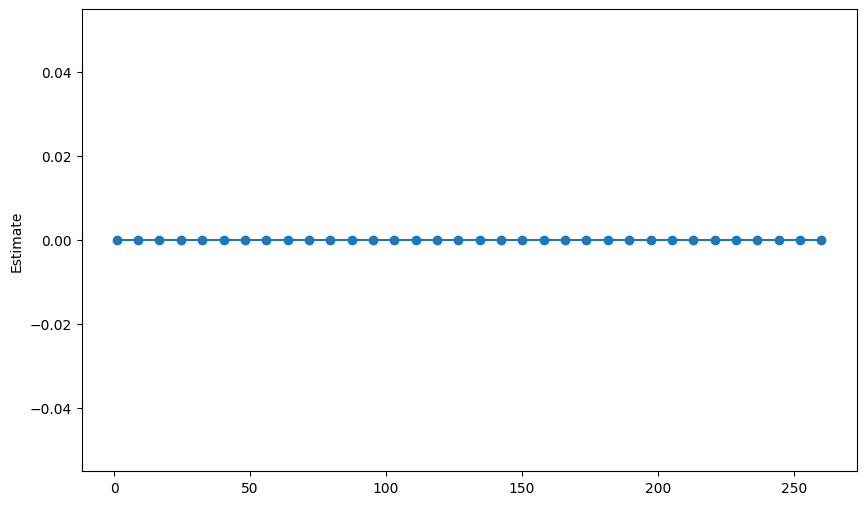

In [17]:
import numpy as np
import matplotlib.pyplot as plt
y_data=np.linspace(min_runs,max_runs,len(x_data))
print(x_data)
_, axis = plt.subplots(figsize=(10, 6))
axis.errorbar(
    y_data,
    x_data,
    fmt="o-",
    capsize=3,
    )
#axis.set_xlabel(bin_id)
axis.set_ylabel("Estimate")
#axis.set_title(f"Estimates by {system_id} and {bin_id}")
#axis.legend()
plt.show()